Nivell 1



- Exercici 1

Mostra totes les transaccions realitzades per empreses d'Alemanya.

a) sin subquery
```
SELECT *
FROM transaction
JOIN
company
ON
WHERE country = 'Germany';
```
b) con subquery
```
SELECT *
FROM transaction
WHERE company_id IN (
	SELECT id
    FROM company
    WHERE country = 'Germany');
```

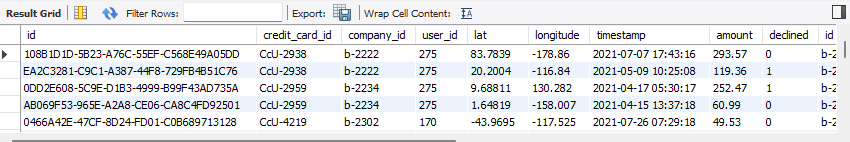



Exercici 2

Màrqueting està preparant alguns informes de tancaments de gestió, et demanen que els passis un llistat de les empreses que han realitzat transaccions per una suma superior a la mitjana de totes les transaccions.

```
SELECT *
FROM company
WHERE id IN (
	SELECT company_id
	FROM transaction
	WHERE amount> (
		SELECT avg(amount)
		FROM transaction
	)
);
```

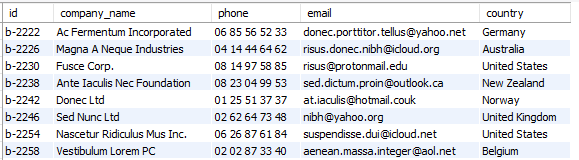



Exercici 3

El departament de comptabilitat va perdre la informació de les transaccions realitzades per una empresa, però no recorden el seu nom, només recorden que el seu nom iniciava amb la lletra c. Com els pots ajudar? Comenta-ho acompanyant-ho de la informació de les transaccions.

```
SELECT *
FROM transaction
WHERE company_id IN (
	SELECT id
	FROM company
	WHERE company_name LIKE 'C%'
);
```

la subquery que primero se ejecuta es la de dentro (la que esta con un tabulador) y selecciona cualquier empresa cuyo nombre empiece con C y cualquier letras despues (C%), una vez obtenida esta seleccion de empresas que cumplen la condicion, se ejecuta la query principal que es obtener todos los datos de la tabla transacciones.

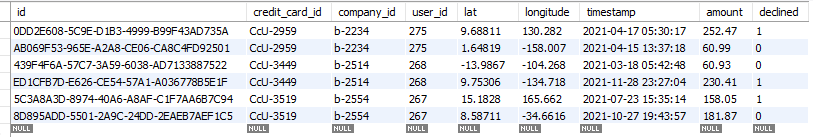


Exercici 4

Van eliminar del sistema les empreses que no tenen transaccions registrades, lliura el llistat d'aquestes empreses.

a) con la expresion NOT EXISTS
```
SELECT *
FROM company
WHERE NOT EXISTS (
	SELECT company_id
    FROM transaction
    WHERE amount > 0
    )
;
```
B) con la expresion NOT IN
```
SELECT *
FROM company
WHERE id NOT IN (
	SELECT company_id
    FROM transaction
    )
;
```

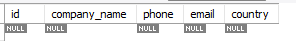



Nivell 2


Exercici 1

En la teva empresa, es planteja un nou projecte per a llançar algunes campanyes publicitàries per a fer competència a la companyia NON institute. Per a això, et demanen la llista de totes les transaccions realitzades per empreses que estan situades en el mateix país que aquesta companyia.

```
SELECT *
FROM transaction
WHERE company_id IN (
	SELECT id
	FROM company
	WHERE country = (
		SELECT country
        FROM company
        WHERE company_name = 'Non Institute'
	)
)
;
```

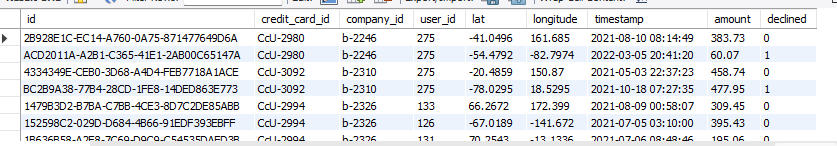




Exercici 2

El departament de comptabilitat necessita que trobis l'empresa que ha realitzat la transacció de major suma en la base de dades.

```
SELECT company_name, MAX(amount)
FROM transaction, company
WHERE company.id IN (
	SELECT company_id
	FROM transaction
	WHERE amount = (
		SELECT MAX(amount) 
		FROM transaction
	)
)
GROUP BY company_name
;

```

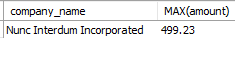


Nivell 3
Exercici 1

S'estan establint els objectius de l'empresa per al següent trimestre, per la qual cosa necessiten una base sòlida per a avaluar el rendiment i mesurar l'èxit en els diferents mercats. Per a això, necessiten el llistat dels països la mitjana de transaccions dels quals sigui superior a la mitjana general.

#con Subqueries

```
SELECT Pais, AVG(amount) as Mediapais  
FROM (SELECT *, (SELECT country FROM company where transaction.company_id= company.id) Pais    
		FROM transactions.transaction) nuevatabla   
GROUP BY Pais
HAVING Mediapais > (SELECT AVG(amount) from transaction);
```



#con JOIN

```
SELECT country, AVG(amount)
FROM transaction
JOIN
company
ON transaction.company_id=company.id
GROUP BY country
HAVING AVG(amount)> (
	SELECT AVG(amount) 
    FROM transaction
)
;
```

#otra forma de JOIN sin usarlo propiamente

```
SELECT country, AVG(amount)
FROM transaction, company
WHERE company.id =company_id
    group by country
	having AVG(amount) > (
		SELECT AVG(amount) 
		FROM transaction
	)
;
```

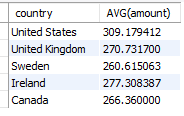


Exercici 2

Necessitem optimitzar l'assignació dels recursos i dependrà de la capacitat operativa que es requereixi, per la qual cosa et demanen la informació sobre la quantitat de transaccions que realitzen les empreses, però el departament de recursos humans és exigent i vol un llistat de les empreses on especifiquis si tenen més de 4 transaccions o menys.

Con Subquery

```
SELECT COUNT(id), (SELECT company_name FROM company WHERE company.id=transaction.company_id) NomCompany,
CASE
	WHEN COUNT(transaction.id) > 4 THEN "Té més de 4 transaccions"
   ELSE 'Té menys de 4 transaccions'
END AS Especificacions
FROM transaction
GROUP BY NomCompany;
```




#con JOIN
```
SELECT company_name, COUNT(transaction.id) QuantitatTransaccions,
CASE
	WHEN COUNT(transaction.id) > 4 THEN "Té més de 4 transaccions"
   ELSE 'Té menys de 4 transaccions'
END AS Especificacions
FROM transaction
JOIN company
ON company.id=transaction.company_id
GROUP BY company_id;
```

#otro tipo de JOIN sin usarlo especificamente
```
SELECT company_name, COUNT(transaction.id) QuantitatTransaccions,
CASE
	WHEN COUNT(transaction.id) > 4 THEN "Té més de 4 transaccions"
   ELSE 'Té menys de 4 transaccions'
END AS Especificacions
FROM transaction, company
where company.id= company_id
GROUP BY company_id;
```

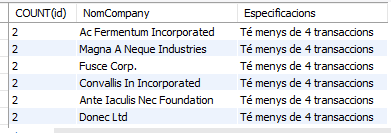



